<a href="https://colab.research.google.com/github/PremTheja/GRU-LSTM-RNN/blob/main/GRU%2CLSTM_%26RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GRU

In [ ]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,GRU,Dense
from tensorflow.keras.preprocessing import sequence

In [ ]:
max_words = 5000
(xt,yt),(xte,yte)= imdb.load_data(num_words=max_words)

max_len =500
xt=sequence.pad_sequences(xt,maxlen=max_len)
xte=sequence.pad_sequences(xte,maxlen=max_len)

model=Sequential()
model.add(Embedding(max_words,100,input_length=max_len))
model.add(GRU(128))
model.add(Dense(1,activation='sigmoid'))

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
batch_size=128
epochs=5
model.fit(xt,yt,batch_size=batch_size,epochs=epochs)

Epoch 1/5
196/196 [==============================] - 51s 223ms/step - loss: 0.5769 - accuracy: 0.6874
Epoch 2/5
196/196 [==============================] - 29s 146ms/step - loss: 0.3084 - accuracy: 0.8718
Epoch 3/5
196/196 [==============================] - 26s 128ms/step - loss: 0.2310 - accuracy: 0.9100
Epoch 4/5
196/196 [==============================] - 14s 72ms/step - loss: 0.1890 - accuracy: 0.9295
Epoch 5/5
196/196 [==============================] - 11s 58ms/step - loss: 0.1577 - accuracy: 0.9413


In [ ]:
#mse for regression prblm output only 1
#binary cross entropy for binary output only 2
#categorical cross entropy for multiple ourput more than 2
#activation - sigmoid relu tanh
#optimizer - stocasticgd gd adam

In [ ]:
loss,accuracy=model.evaluate(xte,yte,batch_size=batch_size)
print("accuracy:",accuracy)
print("loss:",loss)

196/196 [==============================] - 3s 12ms/step - loss: 0.3322 - accuracy: 0.8812
accuracy: 0.8812000155448914
loss: 0.33221983909606934


In [ ]:
history=model.fit(xt,yt,batch_size=batch_size,epochs=epochs)

Epoch 1/5
196/196 [==============================] - 8s 43ms/step - loss: 0.1276 - accuracy: 0.9545
Epoch 2/5
196/196 [==============================] - 9s 46ms/step - loss: 0.0924 - accuracy: 0.9686
Epoch 3/5
196/196 [==============================] - 8s 43ms/step - loss: 0.0804 - accuracy: 0.9725
Epoch 4/5
196/196 [==============================] - 8s 39ms/step - loss: 0.0594 - accuracy: 0.9812
Epoch 5/5
196/196 [==============================] - 7s 37ms/step - loss: 0.0516 - accuracy: 0.9836


In [ ]:
train_loss1 = history.history['loss']
train_acc1 = history.history['accuracy']
xc1=range(len(train_acc1))

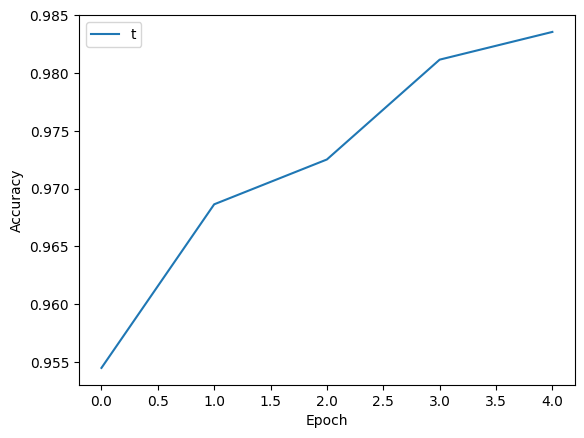

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc1, train_acc1)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend('train')


LSTM

In [ ]:
from tensorflow.keras.layers import Embedding,LSTM,Dense

In [ ]:
model = Sequential()
model.add(Embedding(max_words,100, input_length=max_len))
model.add(LSTM(128))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
epochs = 5
batch_size = 128

hist=model.fit(xt, yt, epochs=epochs, batch_size=batch_size)

Epoch 1/5
196/196 [==============================] - 34s 160ms/step - loss: 0.4810 - accuracy: 0.7665
Epoch 2/5
196/196 [==============================] - 22s 110ms/step - loss: 0.3222 - accuracy: 0.8671
Epoch 3/5
196/196 [==============================] - 17s 85ms/step - loss: 0.2866 - accuracy: 0.8868
Epoch 4/5
196/196 [==============================] - 11s 54ms/step - loss: 0.2181 - accuracy: 0.9161
Epoch 5/5
196/196 [==============================] - 11s 56ms/step - loss: 0.1802 - accuracy: 0.9334


In [ ]:
loss,accuracy=model.evaluate(xte,yte,batch_size=batch_size)
print("accuracy:",accuracy)
print("loss:",loss)

196/196 [==============================] - 3s 14ms/step - loss: 0.3378 - accuracy: 0.8615
accuracy: 0.861519992351532
loss: 0.33780890703201294


In [ ]:
train_loss2 = hist.history['loss']
train_acc2 = hist.history['accuracy']
xc2=range(len(train_acc2))

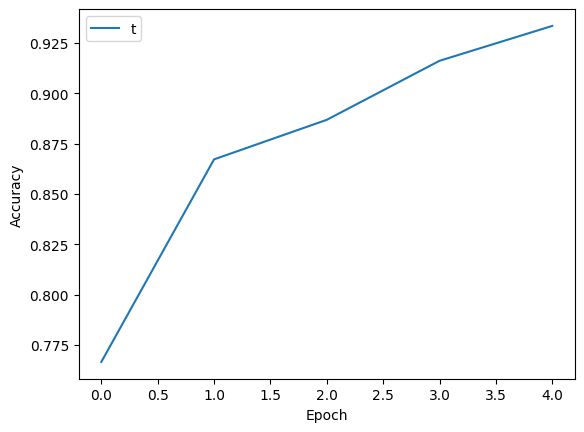

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc2, train_acc2)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend('train')

RNN

In [ ]:
from tensorflow.keras.layers import Embedding,RNN
from keras import layers

In [ ]:
model = Sequential()
model.add(Embedding(max_words,100, input_length=max_len))
model.add(layers.LSTM(128))
model.add(layers.Dense(10))
model.add(Dense(units=1, activation='sigmoid'))

model = keras.Sequential()

model.add(layers.Embedding(input_dim=1000, output_dim=64))

//The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 256) model.add(layers.GRU(256, return_sequences=True))

// The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128) model.add(layers.SimpleRNN(128))

model.add(layers.Dense(10))

model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
epochs = 5
batch_size = 128

h=model.fit(xt, yt, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 34s 198ms/step - loss: 0.4816 - accuracy: 0.7588 - val_loss: 0.3398 - val_accuracy: 0.8572
Epoch 2/5
157/157 [==============================] - 18s 115ms/step - loss: 0.2938 - accuracy: 0.8787 - val_loss: 0.4531 - val_accuracy: 0.7814
Epoch 3/5
157/157 [==============================] - 14s 88ms/step - loss: 0.2330 - accuracy: 0.9109 - val_loss: 0.3069 - val_accuracy: 0.8664
Epoch 4/5
157/157 [==============================] - 11s 66ms/step - loss: 0.1908 - accuracy: 0.9287 - val_loss: 0.3227 - val_accuracy: 0.8664
Epoch 5/5
157/157 [==============================] - 9s 58ms/step - loss: 0.1685 - accuracy: 0.9391 - val_loss: 0.3628 - val_accuracy: 0.8662


In [ ]:
loss,accuracy=model.evaluate(xte,yte,batch_size=batch_size)
print("accuracy:",accuracy)
print("loss:",loss)

196/196 [==============================] - 3s 14ms/step - loss: 0.3633 - accuracy: 0.8690
accuracy: 0.8690400123596191
loss: 0.3633323311805725


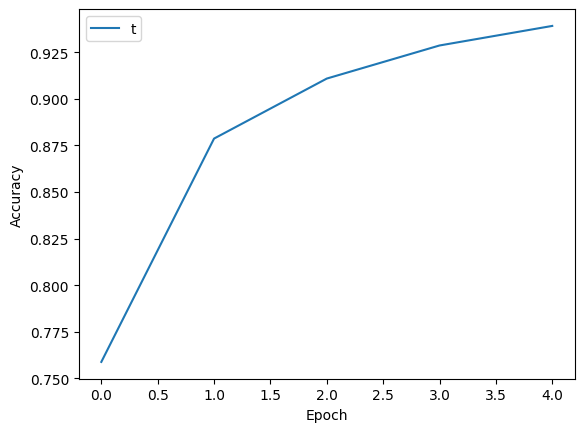

In [ ]:
train_loss3 = h.history['loss']
train_acc3 = h.history['accuracy']
xc3=range(len(train_loss3))
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc3, train_acc3)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend('train')

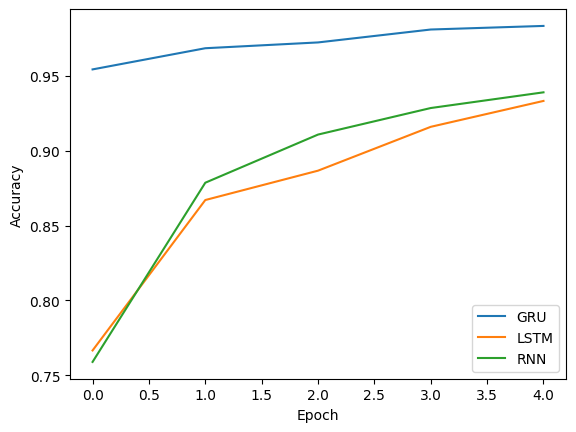

In [ ]:
plt.plot(xc1, train_acc1)
plt.plot(xc2, train_acc2)
plt.plot(xc3, train_acc3)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["GRU","LSTM","RNN"])